# Week 6: Shape Feature

We introduced the shape features in the lecture. This week, we will practice the implementation of those algorithms by using OpenCV and Python.

You should be able to complete the task by following the To-Do List ✅

Please check our previous weeks' lab solutions if you forget how to use certain functions. The solutions are in each week's Bb site folder

> ❗ You can use the Scikit-Learn function to complete your task today, but you should also work on creating those algorithms from scratch. Please check the algorithm from this week's lecture.

## Task 1: Preparision

✅ Mount your google drive

✅ Import libraries such as OpenCV and MatPlotLib

✅ Choose and upload some images from the pedestrains128x64 dataset (__You will use the same dataset to work on some other tasks for Object/Human Detection__)

✅ Load the image by using OpenCV functions

✅ Transfer the colour image into a grayscale image (__The rest of the task only works on shape, so the color is not used this week__)

✅ Display the grayscale image by using MatPlotLib functions.


['D:\\SHU\\ML_lab\\Lab6_shape_feature\\pedestrians_positive\\per00002.ppm', 'D:\\SHU\\ML_lab\\Lab6_shape_feature\\pedestrians_positive\\per00003.ppm', 'D:\\SHU\\ML_lab\\Lab6_shape_feature\\pedestrians_positive\\per00004.ppm']


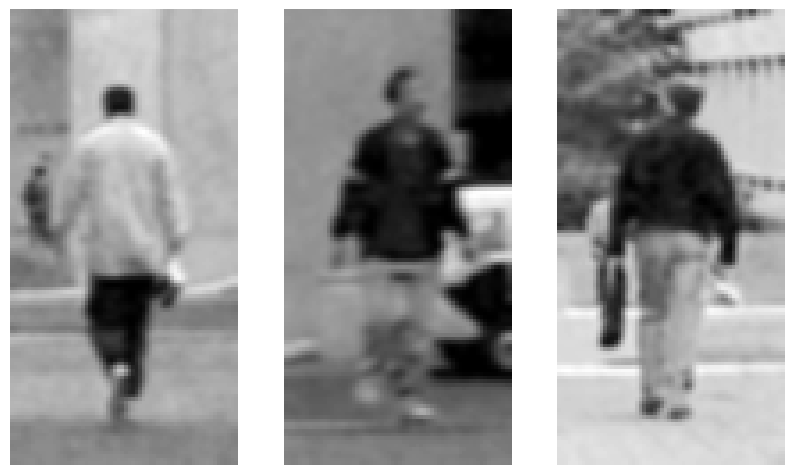

In [16]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

dataset_path = r"D:\SHU\ML_lab\Lab6_shape_feature\pedestrians_positive"
image_paths = [os.path.join(dataset_path, img) for img in os.listdir(dataset_path)][1:4]
print(image_paths)
images = [cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB) for img in image_paths]
grayscale_images = [img[:,:,0] for img in images]
grayscale_images = [cv2.GaussianBlur(img,(5,5),0) for img in grayscale_images]
f,axes = plt.subplots(1,3,figsize=(10,10))
for i,ax in enumerate(axes.flatten()):
  ax.imshow(grayscale_images[i],cmap='gray')
  ax.axis('off')

# different method for large dataset

# cols = 3
# num_images = len(grayscale_images)
# rows = (num_images // cols) + (num_images % cols > 0)  # Auto-calculate rows

# fig, axes = plt.subplots(rows, cols, figsize=(13,7))
# axes = axes.flatten()

# for i, ax in enumerate(axes):
#     if i < num_images:
#         ax.imshow(grayscale_images[i], cmap="gray")
#     ax.axis("off")

# plt.tight_layout()
# plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


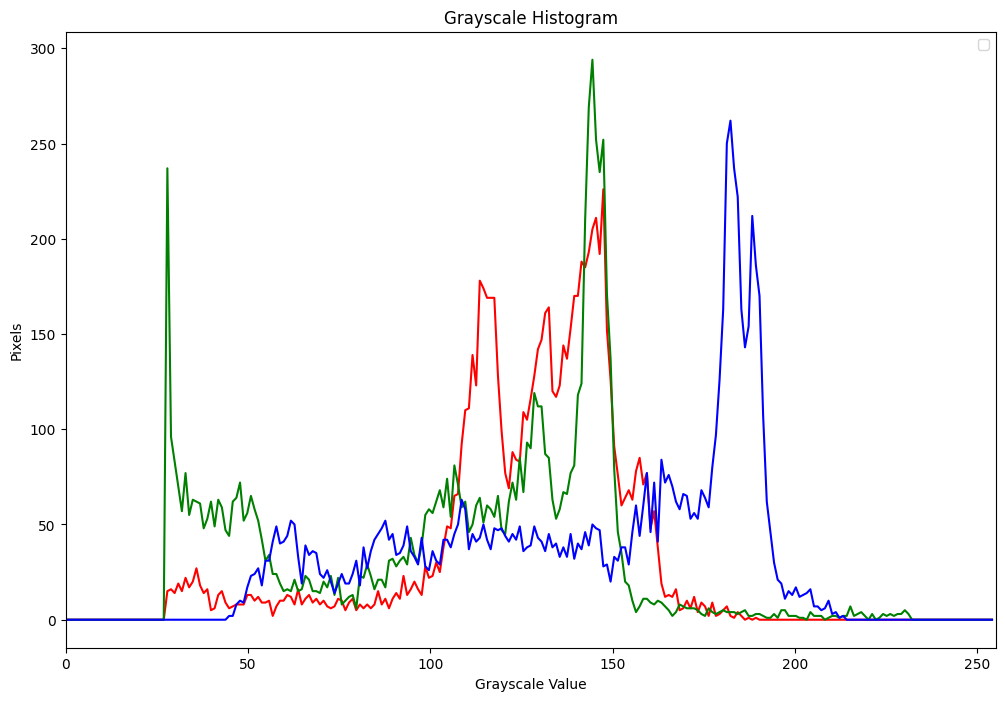

In [26]:

# Assuming grayscale_images is a list of 2D numpy arrays
colors = ['red', 'green', 'blue']
histograms, bin_edges = zip(*[np.histogram(img, bins=256, range=(0, 255)) for img in grayscale_images])

plt.figure(figsize=(12,8))
plt.title("Grayscale Histogram")
plt.xlabel("Grayscale Value")
plt.ylabel("Pixels")
plt.xlim(0, 255) 

bin_centers = bin_edges[0][:-1]  # Use the first bin edges array

for i, histogram in enumerate(histograms):
    plt.plot(bin_centers, histogram, color=colors[i % len(colors)])

plt.legend()  # Add a legend to differentiate histograms
plt.show()


## Task 2 Kernel-based Edge Detection

Some algorithms use edges to describe the shapes. One basic approach is to use kernel-based filters. Please check this [online demo](https://setosa.io/ev/image-kernels/) - Play with it and understand:
1. what are kernels
2. How to define a kernel-size and value in the kernel
3. The type of kernels
4. When to use each kernel for different tasks

__TO DO__

✅ check [this web tutorial](https://www.askpython.com/python-modules/opencv-filter2d) and learn how to implement a kernel-based sobel edge detection by using your image

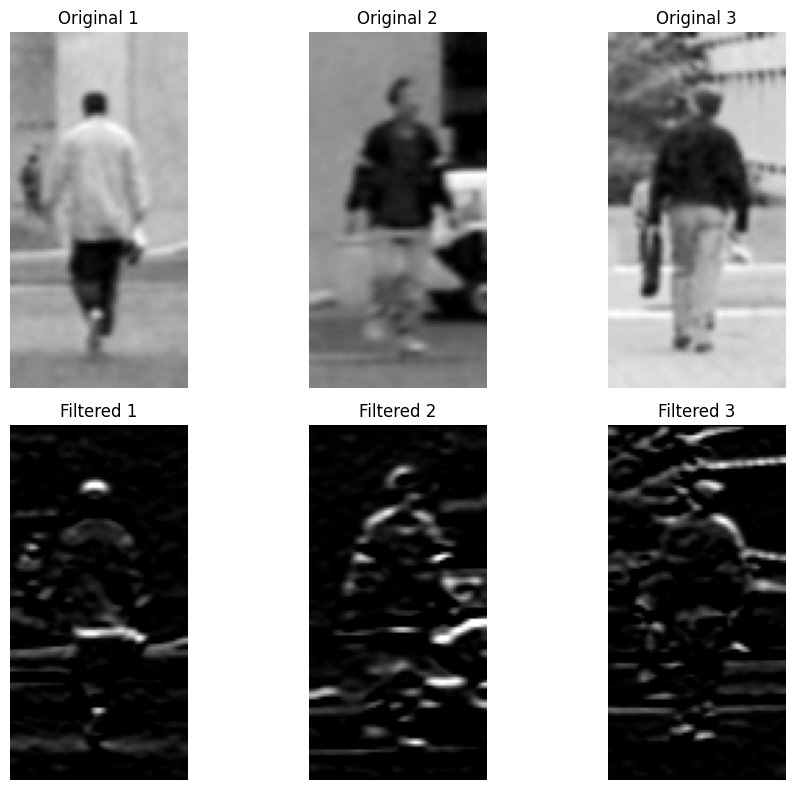

In [32]:
kernel1 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

identity = [cv2.filter2D(src=img, ddepth=-1, kernel=kernel1) for img in grayscale_images]

f,axes = plt.subplots(2,3, figsize=(10,8))
# Loop through images and display them
for i in range(3):
    # First row: original images
    axes[0, i].imshow(grayscale_images[i], cmap='gray')
    axes[0, i].set_title(f"Original {i+1}")
    axes[0, i].axis("off")

    # Second row: filtered images
    axes[1, i].imshow(identity[i], cmap='gray')
    axes[1, i].set_title(f"Filtered {i+1}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

## Task 3 Canny Edge detection

You can work on some advanced edge detection algorithms from OpenCV high-level functions.

try `cv2.Canny()`

The output is a binary image containing the edge of the input. Adjust the threshould 1 and threshold 2 and aperture size. Display the edge images and observe the differences.

Check more details [Here](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)

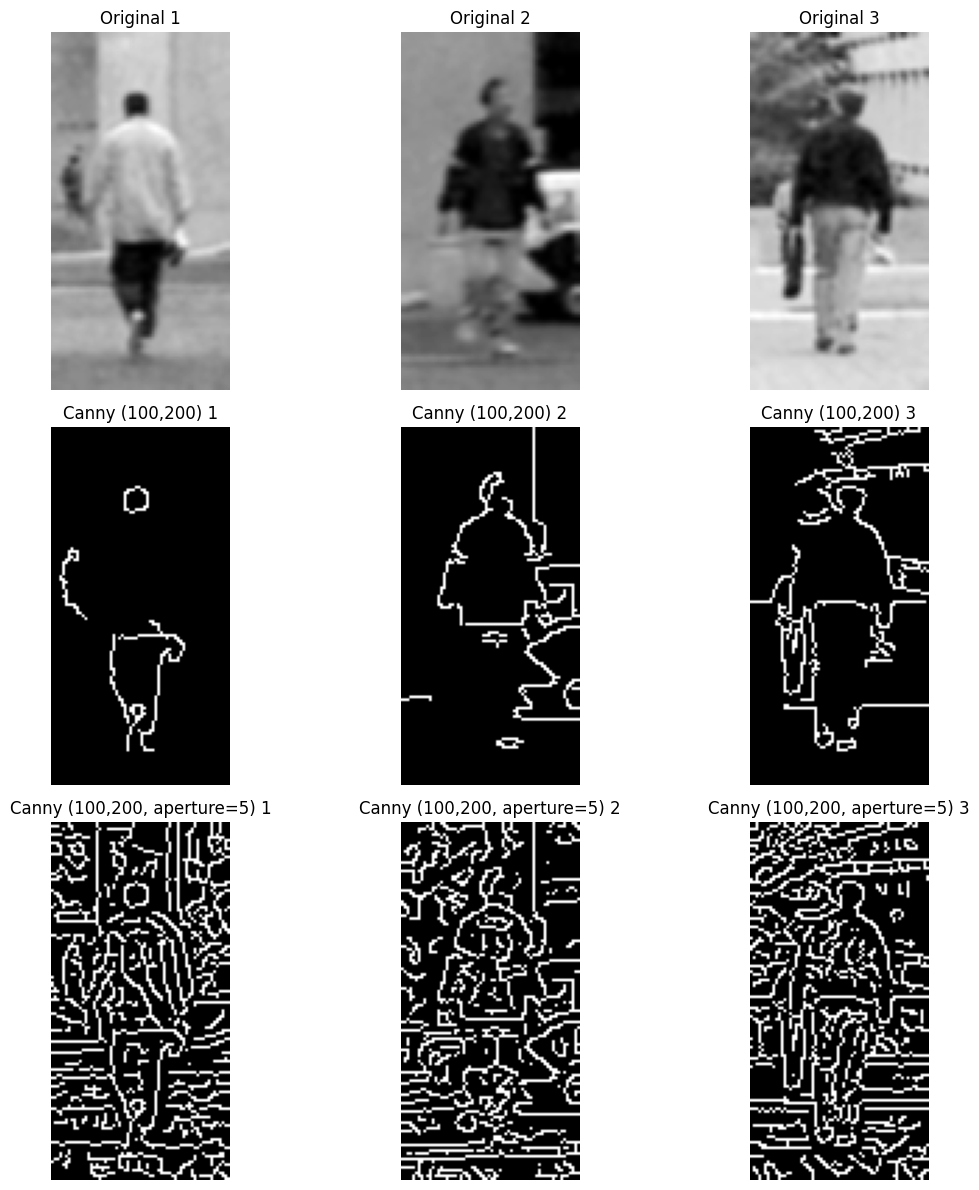

In [33]:
edges_canny_100_200 = [cv2.Canny(img, 100, 200) for img in grayscale_images]
edges_canny_100_200_ap5 = [cv2.Canny(img, 100, 200, apertureSize=5) for img in grayscale_images]

# Display results
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i in range(3):
    axes[0, i].imshow(grayscale_images[i], cmap='gray')
    axes[0, i].set_title(f"Original {i+1}")
    
    axes[1, i].imshow(edges_canny_100_200[i], cmap='gray')
    axes[1, i].set_title(f"Canny (100,200) {i+1}")
    
    axes[2, i].imshow(edges_canny_100_200_ap5[i], cmap='gray')
    axes[2, i].set_title(f"Canny (100,200, aperture=5) {i+1}")

# Hide axes
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()
    


## Task 4: Morphological Demo

To explore how to use morphological image processing methods
1. Erosion
2. Dilation
3. Opening
4. Closing

✅ Run the following code to compare the difference between input and output

✅ Modify the parameters, such as kernel size, iterations and compare the difference again.


In [22]:
import cv2
import numpy as np

obj = np.ones((100,100), np.uint8)
hole = np.zeros((10,10), np.uint8)
obj[25:35,25:35] = hole
noise = np.ones((10,10), np.uint8)
image = np.zeros((300,300), np.uint8)
image[50:150,50:150] = obj
image[200:210,200:210] = noise

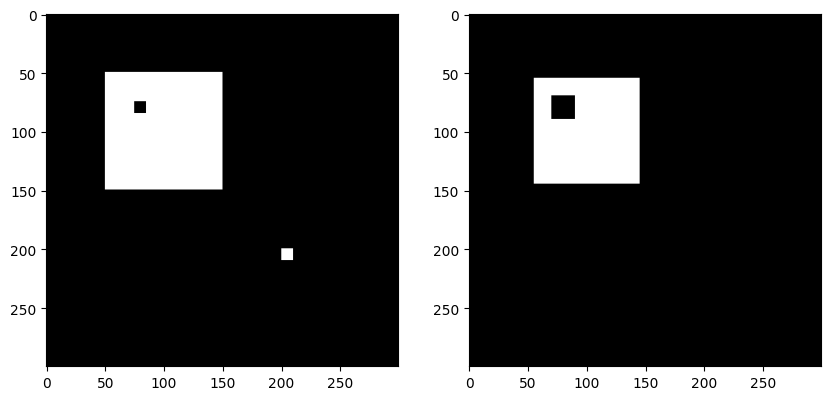

In [23]:
#Erosion
kernel = np.ones((11,11), np.uint8) #Kernel

eroded = cv2.erode(image, kernel, iterations=1)
f,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(image, cmap='gray')
axes[1].imshow(eroded, cmap='gray')

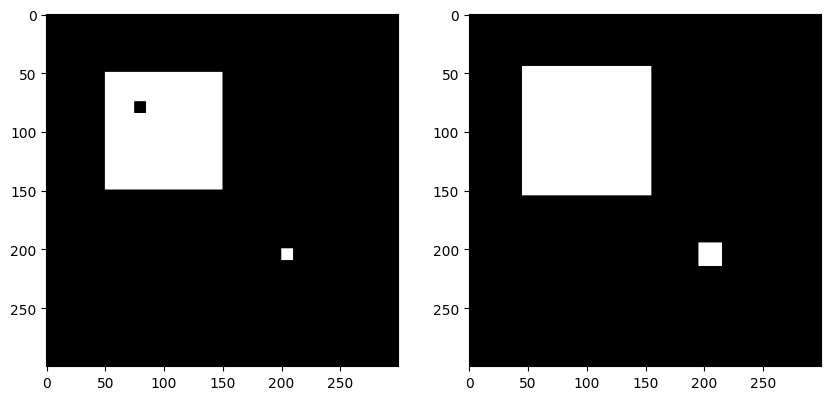

In [24]:
#Dilation
dilated = cv2.dilate(image, kernel, iterations=1)
f,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(image, cmap='gray')
axes[1].imshow(dilated, cmap='gray')

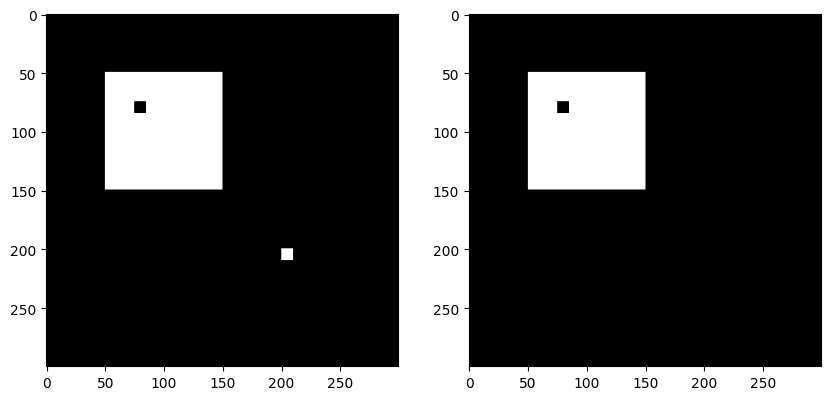

In [25]:
#Opening
Opened= cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
f,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(image, cmap='gray')
axes[1].imshow(Opened, cmap='gray')

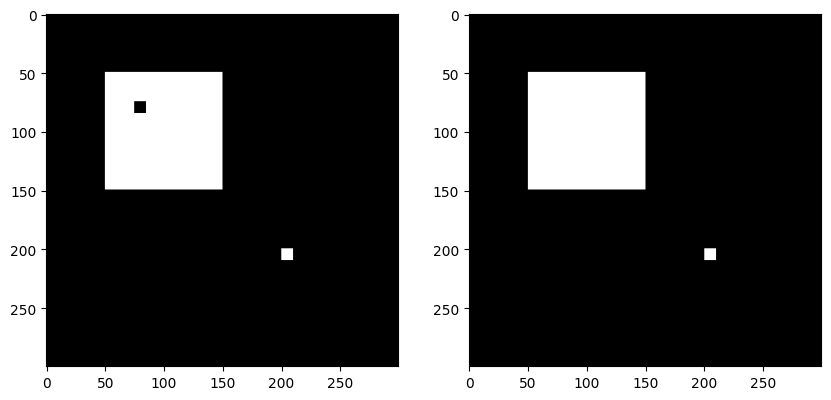

In [26]:
#Closing
closed= cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
f,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(image, cmap='gray')
axes[1].imshow(closed, cmap='gray')

# Task 5:  Morphological Project

You are given a PCB board image. Your task is to locate the vias (the holes on the PCB board) from the image so the automated PCB soldering machine can determine where to apply solder.

The image segmentation for binary image is given. You need to use Morphological Processing methods and some other functions we used in Week 2 to locate those vias.

One possible output can be as fellows:


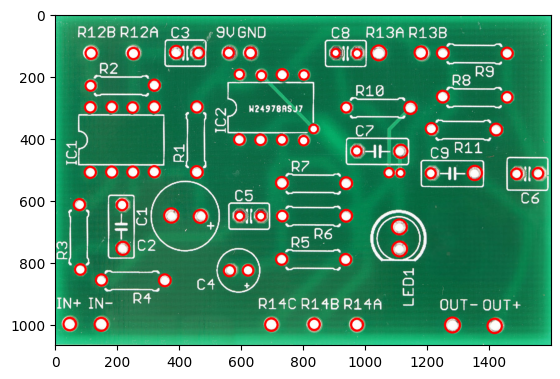


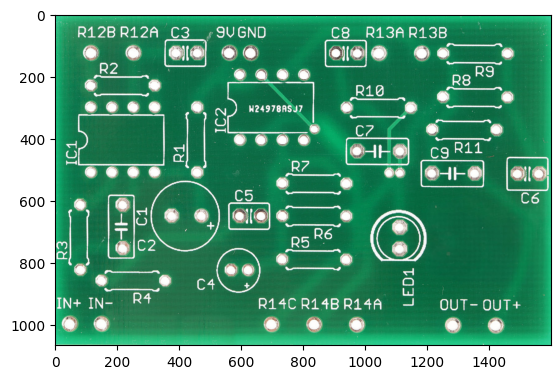

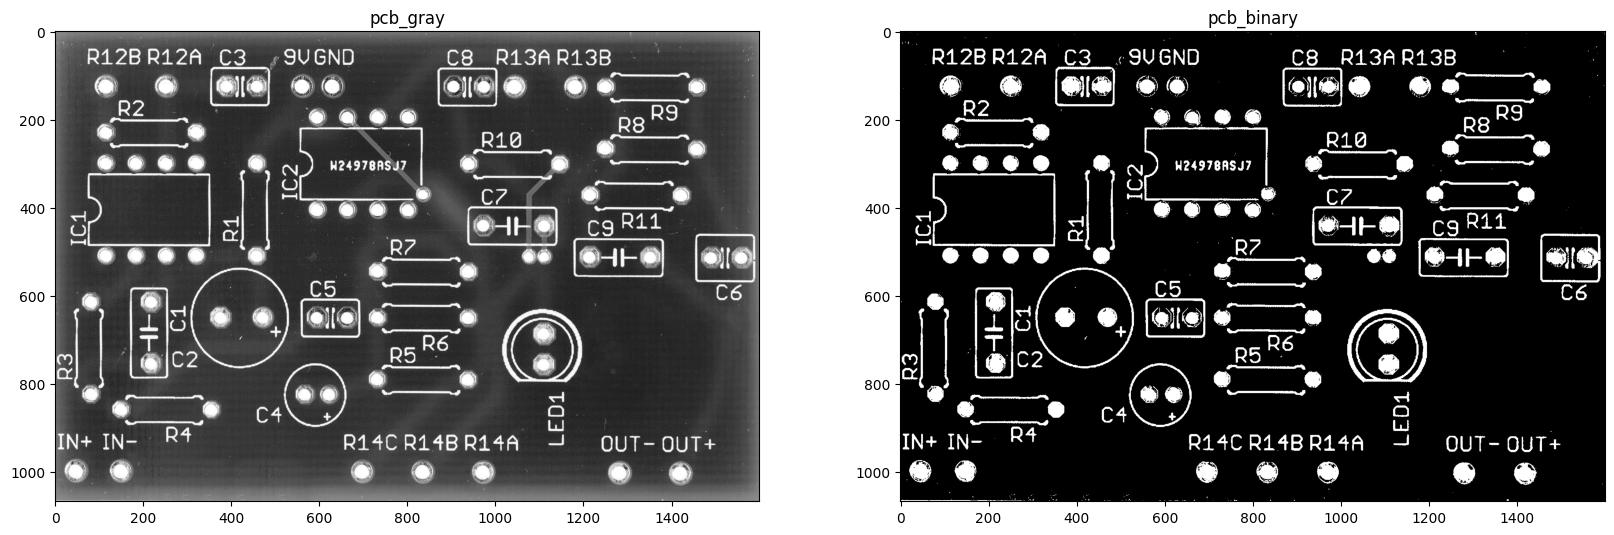

In [38]:
pcb_image = cv2.imread('PCB.jpg') #change it to your own path
pcb_image = cv2.cvtColor(pcb_image, cv2.COLOR_BGR2RGB)
pcb_gray = cv2.cvtColor(pcb_image, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(pcb_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
bw = (thresh==255).astype('uint8') #You need to use this image to complete this task
plt.imshow(pcb_image)
f,axes = plt.subplots(1,2,figsize=(20,10))
axes[0].imshow(pcb_gray, cmap='gray')
axes[0].title.set_text('pcb_gray')
axes[1].imshow(bw, cmap='gray')
axes[1].title.set_text('pcb_binary')

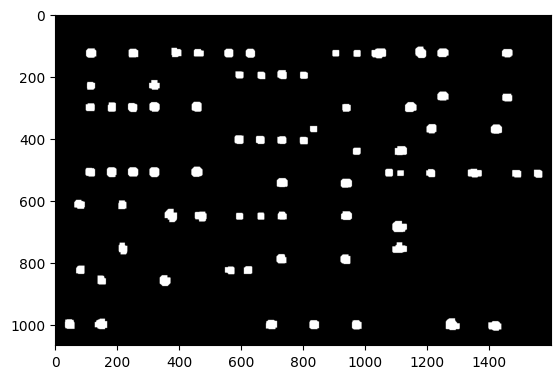

In [41]:
kernel = np.ones((17,17), np.uint8)
output = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)
plt.imshow(output, cmap='gray')#Your code goes here

cnts,_ = cv2.findContours(output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
display = pcb_image.copy()
for i,c in enumerate(cnts):
    # draw a circle enclosing the object
    ((x, y), r) = cv2.minEnclosingCircle(c)
    cv2.circle(display, (int(x), int(y)), int(r), (255, 0, 0), 5)

# plt.imshow(display)